# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [1]:
import os
from pprint import pprint

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### 데이터 읽어오기


In [2]:
RANDOM_STATE = 110

train_data = pd.read_csv("../../data/trim_train_data.csv")
test_data = pd.read_csv("../../data/trim_test_data.csv")

In [3]:
train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240,NaN,NaN,...,127,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000,NaN,NaN,...,73,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000,NaN,NaN,...,197,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240,NaN,NaN,...,27,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,Normal


---

공통 데이터 전처리

In [4]:
# target 열을 임시로 분리
target_train = train_data['target']
target_test = test_data['target']

# 모든 값이 NaN인 열 제거
train_data = train_data.dropna(axis=1, how='all')
test_data = test_data.dropna(axis=1, how='all')

# target 열을 다시 결합
train_data['target'] = target_train
test_data['target'] = target_test

# 제거 후 데이터 확인
print("All columns with only NaN values have been removed, except for the target column.")

All columns with only NaN values have been removed, except for the target column.


C:\Users\juneh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [5]:
wip_line_columns = train_data.filter(like='Wip Line').columns

new_df = train_data.filter(items=wip_line_columns)

new_df.value_counts()

Wip Line_Dam  Wip Line_AutoClave  Wip Line_Fill1  Wip Line_Fill2
IVI-OB6       IVI-OB6             IVI-OB6         IVI-OB6           40506
dtype: int64

In [6]:
train_data.drop(columns=wip_line_columns, inplace=True)
test_data.drop(columns=wip_line_columns, inplace=True)

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
Process_Desc_col = train_data.filter(like='Process Desc').columns

new2_df = train_data.filter(items=Process_Desc_col)

new2_df.value_counts()

Process Desc._Dam  Process Desc._AutoClave  Process Desc._Fill1  Process Desc._Fill2
Dam Dispenser      Auto Clave Out           Fill1 Dispenser      Fill2 Dispenser        40506
dtype: int64

In [8]:
train_data = train_data.drop(columns=['Process Desc._Dam', 'Process Desc._AutoClave', 'Process Desc._Fill1', 'Process Desc._Fill2'])
test_data = test_data.drop(columns=['Process Desc._Dam', 'Process Desc._AutoClave', 'Process Desc._Fill1', 'Process Desc._Fill2'])

In [9]:
# Equipment로 시작하는 열 필터링
Equipment_col = train_data.filter(like='Equipment').columns
new3_df = train_data.filter(items=Equipment_col)

# target 변수 추가
new3_df['target'] = train_data['target']

# 그룹별로 target 변수의 비율 계산
target_ratio = new3_df.groupby(list(Equipment_col))['target'].value_counts(normalize=True).unstack().fillna(0)

# AbNormal 비율 출력
abnormal_ratio = target_ratio.get('AbNormal', 0)
print("각 그룹의 abnormal_ratio:")
print(abnormal_ratio)

# 각 그룹에 값의 갯수 출력
group_counts = new3_df.groupby(list(Equipment_col)).size()
print("각 그룹의 값의 갯수:")
print(group_counts)


각 그룹의 abnormal_ratio:
Equipment_Dam     Equipment_AutoClave  Equipment_Fill1     Equipment_Fill2   
Dam dispenser #1  Auto Clave Out       Fill1 dispenser #1  Fill2 dispenser #1    0.058614
                                                           Fill2 dispenser #2    1.000000
                                       Fill1 dispenser #2  Fill2 dispenser #2    1.000000
Dam dispenser #2  Auto Clave Out       Fill1 dispenser #1  Fill2 dispenser #1    1.000000
                                       Fill1 dispenser #2  Fill2 dispenser #1    1.000000
                                                           Fill2 dispenser #2    0.054977
Name: AbNormal, dtype: float64
각 그룹의 값의 갯수:
Equipment_Dam     Equipment_AutoClave  Equipment_Fill1     Equipment_Fill2   
Dam dispenser #1  Auto Clave Out       Fill1 dispenser #1  Fill2 dispenser #1    25011
                                                           Fill2 dispenser #2        6
                                       Fill1 dispenser #2  Fill2

In [10]:
# Equipment로 시작하는 열 필터링
Equipment_col = train_data.filter(like='Equipment').columns
Equipment_col2 = test_data.filter(like='Equipment').columns

new3_df = train_data.filter(items=Equipment_col)
new3_df2 = test_data.filter(items=Equipment_col2)

# Equipment_same_num 파생변수 생성
def determine_equipment_same_num(row):
    if (row['Equipment_Dam'] == 'Dam dispenser #1' and row['Equipment_AutoClave'] == 'Auto Clave Out' and 
        row['Equipment_Fill1'] == 'Fill1 dispenser #1' and row['Equipment_Fill2'] == 'Fill2 dispenser #1') or \
       (row['Equipment_Dam'] == 'Dam dispenser #2' and row['Equipment_AutoClave'] == 'Auto Clave Out' and 
        row['Equipment_Fill1'] == 'Fill1 dispenser #2' and row['Equipment_Fill2'] == 'Fill2 dispenser #2'):
        return 1
    else:
        return 0

train_data['Equipment_same_num'] = new3_df.apply(determine_equipment_same_num, axis=1)
test_data['Equipment_same_num'] = new3_df2.apply(determine_equipment_same_num, axis=1)

train_data = train_data.drop(columns=['Equipment_Dam', 'Equipment_AutoClave', 'Equipment_Fill1', 'Equipment_Fill2'])
test_data = test_data.drop(columns=['Equipment_Dam', 'Equipment_AutoClave', 'Equipment_Fill1', 'Equipment_Fill2'])


In [11]:
Process_Desc_col = train_data.filter(like='Model.Suffix').columns

new2_df = train_data.filter(items=Process_Desc_col)

new2_df.value_counts()

Model.Suffix_Dam  Model.Suffix_AutoClave  Model.Suffix_Fill1  Model.Suffix_Fill2
AJX75334501       AJX75334501             AJX75334501         AJX75334501           33820
AJX75334502       AJX75334502             AJX75334502         AJX75334502            3390
AJX75334505       AJX75334505             AJX75334505         AJX75334505            2635
AJX75334507       AJX75334507             AJX75334507         AJX75334507             310
AJX75334503       AJX75334503             AJX75334503         AJX75334503             162
AJX75334506       AJX75334506             AJX75334506         AJX75334506             129
AJX75334508       AJX75334508             AJX75334508         AJX75334508              60
dtype: int64

In [12]:
# Model.Suffix_Dam의 이름을 Model.Suffix로 변경
train_data = train_data.rename(columns={'Model.Suffix_Dam': 'Model.Suffix'})
test_data = test_data.rename(columns={'Model.Suffix_Dam': 'Model.Suffix'})

# Model.Suffix_AutoClave, Model.Suffix_Fill1, Model.Suffix_Fill2 열 드롭
train_data = train_data.drop(columns=['Model.Suffix_AutoClave', 'Model.Suffix_Fill1', 'Model.Suffix_Fill2'])
test_data = test_data.drop(columns=['Model.Suffix_AutoClave', 'Model.Suffix_Fill1', 'Model.Suffix_Fill2'])

In [13]:
# Workorder로 시작하는 열 필터링
workorder_cols = ['Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2']

# Workorder 열들로 이루어진 데이터프레임 생성
workorder_df = train_data[workorder_cols]

# 4개의 변수의 값이 모두 동일하지 않은 행 필터링
different_workorders = workorder_df[
    (workorder_df['Workorder_Dam'] != workorder_df['Workorder_AutoClave']) |
    (workorder_df['Workorder_Dam'] != workorder_df['Workorder_Fill1']) |
    (workorder_df['Workorder_Dam'] != workorder_df['Workorder_Fill2']) |
    (workorder_df['Workorder_AutoClave'] != workorder_df['Workorder_Fill1']) |
    (workorder_df['Workorder_AutoClave'] != workorder_df['Workorder_Fill2']) |
    (workorder_df['Workorder_Fill1'] != workorder_df['Workorder_Fill2'])
]

# 결과 출력
print("4개의 변수의 값이 모두 동일하지 않은 경우:")
print(different_workorders)

4개의 변수의 값이 모두 동일하지 않은 경우:
Empty DataFrame
Columns: [Workorder_Dam, Workorder_AutoClave, Workorder_Fill1, Workorder_Fill2]
Index: []


In [14]:
# Model.Suffix_Dam의 이름을 Model.Suffix로 변경
train_data = train_data.rename(columns={'Workorder_Dam': 'Workorder'})
test_data = test_data.rename(columns={'Workorder_Dam': 'Workorder'})

# Model.Suffix_AutoClave, Model.Suffix_Fill1, Model.Suffix_Fill2 열 드롭
train_data = train_data.drop(columns=['Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2'])
test_data = test_data.drop(columns=['Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2'])

In [15]:
len(train_data.iloc[:,0])

40506

In [16]:
Process_Desc_col = train_data.filter(like='Insp. Seq No.').columns

new2_df = train_data.filter(items=Process_Desc_col)

new2_df.value_counts()

Insp. Seq No._Dam  Insp. Seq No._AutoClave  Insp. Seq No._Fill1  Insp. Seq No._Fill2
1                  1                        1                    1                      40506
dtype: int64

In [17]:
train_data = train_data.drop(columns=['Insp. Seq No._Dam', 'Insp. Seq No._AutoClave', 'Insp. Seq No._Fill1', 'Insp. Seq No._Fill2'])
test_data = test_data.drop(columns=['Insp. Seq No._Dam', 'Insp. Seq No._AutoClave', 'Insp. Seq No._Fill1', 'Insp. Seq No._Fill2'])

In [18]:
Process_Desc_col = train_data.filter(like='Insp Judge Code').columns

new2_df = train_data.filter(items=Process_Desc_col)

new2_df.value_counts()

Insp Judge Code_Dam  Insp Judge Code_AutoClave  Insp Judge Code_Fill1  Insp Judge Code_Fill2
OK                   OK                         OK                     OK                       40506
dtype: int64

In [19]:
train_data = train_data.drop(columns=['Insp Judge Code_Dam', 'Insp Judge Code_AutoClave', 'Insp Judge Code_Fill1', 'Insp Judge Code_Fill2'])
test_data = test_data.drop(columns=['Insp Judge Code_Dam', 'Insp Judge Code_AutoClave', 'Insp Judge Code_Fill1', 'Insp Judge Code_Fill2'])

In [20]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 161 entries, Model.Suffix to Equipment_same_num
dtypes: float64(64), int64(85), object(12)
memory usage: 49.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 162 entries, Set ID to Equipment_same_num
dtypes: float64(122), int64(28), object(12)
memory usage: 21.5+ MB


In [21]:
# 값의 종류가 1개이고 결측값이 없는 열을 제거하는 함수
def drop_single_value_columns(df):
    cols_to_drop = [col for col in df.columns if col != 'target' and df[col].nunique() == 1 and df[col].isnull().sum() == 0]
    df_dropped = df.drop(columns=cols_to_drop)
    return df_dropped, cols_to_drop

# train_data와 test_data에서 해당 열 제거 및 삭제된 열 이름과 개수 출력
train_data, train_cols_dropped = drop_single_value_columns(train_data)
test_data, test_cols_dropped = drop_single_value_columns(test_data)

# print("삭제된 train_data 열 이름:", train_cols_dropped)
print("삭제된 train_data 열 개수:", len(train_cols_dropped))

# print("삭제된 test_data 열 이름:", test_cols_dropped)
print("삭제된 test_data 열 개수:", len(test_cols_dropped))

삭제된 train_data 열 개수: 42
삭제된 test_data 열 개수: 42


In [22]:
train_data.info()
print('---')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 119 entries, Model.Suffix to Equipment_same_num
dtypes: float64(58), int64(52), object(9)
memory usage: 36.8+ MB
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 120 entries, Set ID to Equipment_same_num
dtypes: float64(94), int64(17), object(9)
memory usage: 15.9+ MB


In [23]:
train_data

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION ? Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION ? Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,...,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target,Equipment_same_num
0,AJX75334505,4F1XA938-1,240,2.5,-90,100,1030,-90,16,14.9,...,243.7,243.7,114.612,19.9,7,127,1,NaN,Normal,1
1,AJX75334505,3KPM0016-2,240,2.5,-90,70,1030,-90,10,21.3,...,243.7,243.7,85.000,19.6,7,185,1,0.0,Normal,1
2,AJX75334501,4E1X9167-1,1000,12.5,90,85,280,90,16,14.7,...,243.5,243.5,114.612,19.8,10,73,1,NaN,Normal,1
3,AJX75334501,3K1X0057-1,1000,12.5,90,70,280,90,10,21.3,...,243.5,243.5,85.000,19.9,12,268,1,0.0,Normal,1
4,AJX75334501,3HPM0007-1,240,2.5,-90,70,1030,-90,10,9.7,...,243.7,243.7,85.000,19.7,8,121,1,0.0,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,2.5,-90,70,1030,-90,10,17.0,...,243.7,243.7,85.000,19.2,1,318,1,0.0,Normal,1
40502,AJX75334501,4E1XC796-1,1000,12.5,90,100,280,90,16,14.9,...,243.5,243.5,114.612,20.5,14,197,1,NaN,Normal,1
40503,AJX75334501,4C1XD438-1,240,2.5,-90,100,1030,-90,16,14.2,...,243.7,243.7,85.000,19.7,1,27,1,NaN,Normal,1
40504,AJX75334501,3I1XA258-1,1000,12.5,90,70,280,90,10,9.7,...,243.5,243.5,85.000,20.1,13,117,1,0.0,Normal,1


---

In [24]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

개별 공정별 데이터 전처리

## Dam

## AutoClave

In [25]:
# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("<AutoClave 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<AutoClave 공정 관련 변수>
1st Pressure Collect Result_AutoClave
1st Pressure 1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
Chamber Temp. Collect Result_AutoClave
Chamber Temp. Unit Time_AutoClave
Chamber Temp. Judge Value_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave


In [26]:
# 변수명 변경
train_data = train_data.rename(columns={'1st Pressure 1st Pressure Unit Time_AutoClave': '1st Pressure Unit Time_AutoClave'})
test_data = test_data.rename(columns={'1st Pressure 1st Pressure Unit Time_AutoClave': '1st Pressure Unit Time_AutoClave'})

train_data = train_data.rename(columns={'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave': 'GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'})
test_data = test_data.rename(columns={'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave': 'GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'})

In [27]:
# 파생변수 생성
train_data['1st_Pressure_x_AutoClave'] = train_data['1st Pressure Collect Result_AutoClave'] * train_data['1st Pressure Unit Time_AutoClave'] 
test_data['1st_Pressure_x_AutoClave'] = test_data['1st Pressure Collect Result_AutoClave'] * test_data['1st Pressure Unit Time_AutoClave'] 

train_data['2nd_Pressure_x_AutoClave'] = train_data['2nd Pressure Collect Result_AutoClave'] * train_data['2nd Pressure Unit Time_AutoClave'] 
test_data['2nd_Pressure_x_AutoClave'] = test_data['2nd Pressure Collect Result_AutoClave'] * test_data['2nd Pressure Unit Time_AutoClave'] 

train_data['3rd_Pressure_x_AutoClave'] = train_data['3rd Pressure Collect Result_AutoClave'] * train_data['3rd Pressure Unit Time_AutoClave'] 
test_data['3rd_Pressure_x_AutoClave'] = test_data['3rd Pressure Collect Result_AutoClave'] * test_data['3rd Pressure Unit Time_AutoClave'] 

train_data['Chamber_Temp_x_AutoClave'] = train_data['Chamber Temp. Collect Result_AutoClave'] * train_data['Chamber Temp. Unit Time_AutoClave']
test_data['Chamber_Temp_x_AutoClave'] = test_data['Chamber Temp. Collect Result_AutoClave'] * test_data['Chamber Temp. Unit Time_AutoClave']

train_data['Chamber_Temp_ok_AutoClave'] = train_data['Chamber Temp. Judge Value_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)
test_data['Chamber_Temp_ok_AutoClave'] = test_data['Chamber Temp. Judge Value_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)

train_data['GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave'] = train_data['GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)
test_data['GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave'] = test_data['GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'].apply(lambda x: 1 if x == 'OK' else 0)


In [28]:
# 변수 제거
train_data.drop(columns=[
    'Chamber Temp. Collect Result_AutoClave'
    , 'Chamber Temp. Unit Time_AutoClave'
    , 'Chamber Temp. Judge Value_AutoClave'
    , 'GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'
    , 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'
    , '1st Pressure Collect Result_AutoClave'
    , '1st Pressure Unit Time_AutoClave'
    , '2nd Pressure Collect Result_AutoClave'
    , '2nd Pressure Unit Time_AutoClave'
    , '3rd Pressure Collect Result_AutoClave'
    , '3rd Pressure Unit Time_AutoClave'], inplace=True)

test_data.drop(columns=[
    'Chamber Temp. Collect Result_AutoClave'
    , 'Chamber Temp. Unit Time_AutoClave'
    , 'Chamber Temp. Judge Value_AutoClave'
    , 'GMES_ORIGIN_INSP_JUDGE_CODE_AutoClave'
    , 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'
    , '1st Pressure Collect Result_AutoClave'
    , '1st Pressure Unit Time_AutoClave'
    , '2nd Pressure Collect Result_AutoClave'
    , '2nd Pressure Unit Time_AutoClave'
    , '3rd Pressure Collect Result_AutoClave'
    , '3rd Pressure Unit Time_AutoClave'], inplace=True)

In [29]:
# '_AutoClave'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("<AutoClave 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<AutoClave 공정 관련 변수>
1st_Pressure_x_AutoClave
2nd_Pressure_x_AutoClave
3rd_Pressure_x_AutoClave
Chamber_Temp_x_AutoClave
Chamber_Temp_ok_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave


## Fill1

In [30]:
train_data

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION ? Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION ? Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,...,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target,Equipment_same_num,1st_Pressure_x_AutoClave,2nd_Pressure_x_AutoClave,3rd_Pressure_x_AutoClave,Chamber_Temp_x_AutoClave,Chamber_Temp_ok_AutoClave,GMES_ORIGIN_INSP_JUDGE_CODE_ok_AutoClave
0,AJX75334505,4F1XA938-1,240,2.5,-90,100,1030,-90,16,14.9,...,1,NaN,Normal,1,74.880,0.493,59.880,19494,1,0
1,AJX75334505,3KPM0016-2,240,2.5,-90,70,1030,-90,10,21.3,...,1,0.0,Normal,1,74.951,37.631,60.258,26082,1,0
2,AJX75334501,4E1X9167-1,1000,12.5,90,85,280,90,16,14.7,...,1,NaN,Normal,1,75.915,0.490,60.258,20328,1,1
3,AJX75334501,3K1X0057-1,1000,12.5,90,70,280,90,10,21.3,...,1,0.0,Normal,1,72.059,36.300,60.500,26082,1,0
4,AJX75334501,3HPM0007-1,240,2.5,-90,70,1030,-90,10,9.7,...,1,0.0,Normal,1,72.480,36.240,59.760,22560,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,2.5,-90,70,1030,-90,10,17.0,...,1,0.0,Normal,1,72.300,36.300,60.500,26082,1,0
40502,AJX75334501,4E1XC796-1,1000,12.5,90,100,280,90,16,14.9,...,1,NaN,Normal,1,73.200,0.493,59.760,17689,0,0
40503,AJX75334501,4C1XD438-1,240,2.5,-90,100,1030,-90,16,14.2,...,1,NaN,Normal,1,74.469,0.490,60.258,17424,0,1
40504,AJX75334501,3I1XA258-1,1000,12.5,90,70,280,90,10,9.7,...,1,0.0,Normal,1,72.782,36.663,60.379,26082,1,0


In [31]:
# Extracting the specified columns
extracted_columns = train_data.filter(regex='(Model\.Suffix|Workorder|target|Fill1)')
extracted_data = extracted_columns

In [32]:
extracted_data.columns.tolist()

['Model.Suffix',
 'Workorder',
 'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1',
 'Dispense Volume(Stage1) Collect Result_Fill1',
 'Dispense Volume(Stage2) Collect Result_Fill1',
 'Dispense Volume(Stage3) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
 'HEAD NORMAL COORDINATE Z AXIS(S

model.suffix 별로 그룹화 한 뒤에 machine tact time의 평균을 구해서 각 model 별로 machine tact time에서 차이가 존재하는지 확인해본다.

In [33]:
# Group by 'Model.Suffix' and calculate the average value of 'Machine Tact time Collect Result_Fill1'
average_machine_tact_time = extracted_data.groupby('Model.Suffix')['Machine Tact time Collect Result_Fill1'].mean()
average_machine_tact_time

Model.Suffix
AJX75334501    67.137954
AJX75334502    59.163009
AJX75334503    64.679630
AJX75334505    58.186224
AJX75334506    67.939535
AJX75334507    57.819032
AJX75334508    56.170000
Name: Machine Tact time Collect Result_Fill1, dtype: float64

차이를 확인해본 결과 model간에 차이는 존재했다.

다음으로 machine tact time을 기준으로 계급으로 나눈 후 각 계급에서의 정상, 비정상 개수를 확인해보았다.

In [34]:
# Divide the machine tact time into 10 classes
time_bins = pd.cut(extracted_data['Machine Tact time Collect Result_Fill1'], bins=10)

# Group by the time bins and target to find the count of abnormal and normal for each class
class_counts = extracted_data.groupby([time_bins, 'target']).size().unstack(fill_value=0)
class_counts


target,AbNormal,Normal
Machine Tact time Collect Result_Fill1,,
"(-0.215, 21.49]",1,0
"(21.49, 42.98]",1,7
"(42.98, 64.47]",1362,25419
"(64.47, 85.96]",211,4377
"(85.96, 107.45]",761,8248
"(107.45, 128.94]",12,97
"(128.94, 150.43]",1,3
"(150.43, 171.92]",0,1
"(171.92, 193.41]",1,2


Machine tact time의 분포를 확인해본 결과 특정 시간대에 몰려있음을 알 수 있었다.

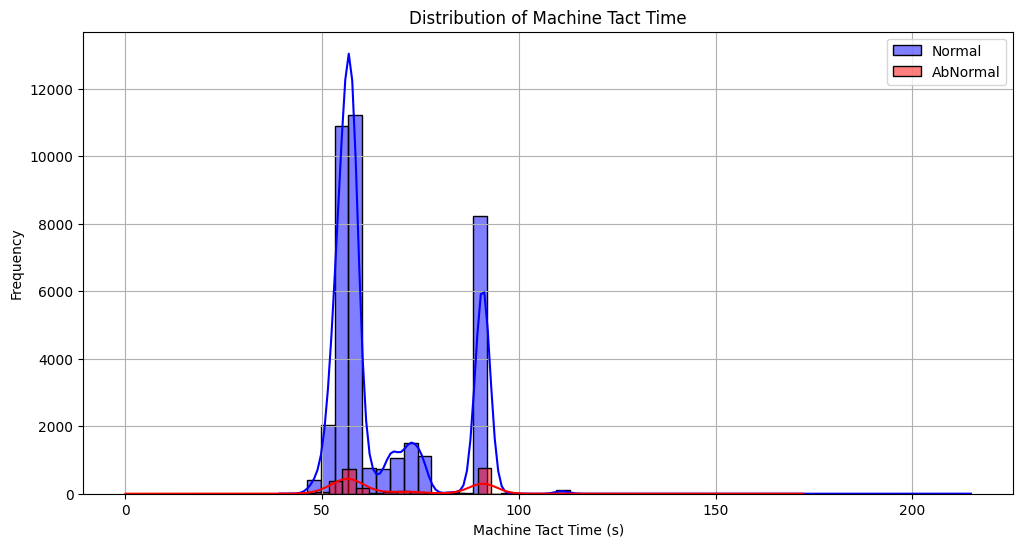

In [35]:
# Filter the data for abnormal and normal
abnormal_data = extracted_data[extracted_data['target'] == 'AbNormal']
normal_data = extracted_data[extracted_data['target'] == 'Normal']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(normal_data['Machine Tact time Collect Result_Fill1'], bins=50, kde=True, color='blue', label='Normal')
sns.histplot(abnormal_data['Machine Tact time Collect Result_Fill1'], bins=50, kde=True, color='red', label='AbNormal')

plt.title('Distribution of Machine Tact Time')
plt.xlabel('Machine Tact Time (s)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Divide the machine tact time into 20 classes
time_bins_30 = pd.cut(extracted_data['Machine Tact time Collect Result_Fill1'], bins=30)

# Group by the time bins and target to find the count of abnormal and normal for each class
class_counts_30 = extracted_data.groupby([time_bins_30, 'target']).size().unstack(fill_value=0)
class_counts_30

target,AbNormal,Normal
Machine Tact time Collect Result_Fill1,,
"(-0.215, 7.163]",1,0
"(7.163, 14.327]",0,0
"(14.327, 21.49]",0,0
"(21.49, 28.653]",0,0
"(28.653, 35.817]",0,0
"(35.817, 42.98]",1,7
"(42.98, 50.143]",24,442
"(50.143, 57.307]",791,15296
"(57.307, 64.47]",547,9681


In [37]:
# Calculate the abnormal composition ratio for each class
class_counts_30['Abnormal Composition Ratio'] = class_counts_30['AbNormal'] / (class_counts_30['AbNormal'] + class_counts_30['Normal'])

# Fill NaN values with 0 (in cases where both AbNormal and Normal counts are 0)
class_counts_30['Abnormal Composition Ratio'].fillna(0, inplace=True)

class_counts_30

target,AbNormal,Normal,Abnormal Composition Ratio
Machine Tact time Collect Result_Fill1,,,
"(-0.215, 7.163]",1,0,1.000000
"(7.163, 14.327]",0,0,0.000000
"(14.327, 21.49]",0,0,0.000000
"(21.49, 28.653]",0,0,0.000000
"(28.653, 35.817]",0,0,0.000000
"(35.817, 42.98]",1,7,0.125000
"(42.98, 50.143]",24,442,0.051502
"(50.143, 57.307]",791,15296,0.049170
"(57.307, 64.47]",547,9681,0.053481


Machine tact time별로 비정상, 정상, 비정상 비율을 확인해봤을 때 전체 평균 비정상 비율보다 높은 구간이 존재하는 것을 알 수 있었다.

따라서 평균 비정상 비율보다 높은 구간만 따로 자세히 확인해 볼 필요가 있었다.

In [38]:
# Find the range of machine tact time corresponding to the specified section
selected_range = class_counts_30.index[11:12]  # iloc[8:9] corresponds to the 9th and 10th intervals

# Filter the extracted data for the selected range
filtered_data = extracted_data[extracted_data['Machine Tact time Collect Result_Fill1'].between(selected_range[0].left, selected_range[-1].right)]

# Get the number of unique 'Model.Suffix' rows in the filtered data
filtered_data['Model.Suffix'].value_counts()


AJX75334501    76
AJX75334502     3
AJX75334503     1
AJX75334505     1
Name: Model.Suffix, dtype: int64

In [39]:
# Define the tact time ranges
tact_time_ranges = [(78.797, 85.96),(107.45, 114.613)]

# Initialize an empty dictionary to store the results
model_suffix_counts_by_range = {}

# Iterate over the defined tact time ranges
for start, end in tact_time_ranges:
    # Filter the data for the specified tact time range
    filtered_data = extracted_data[extracted_data['Machine Tact time Collect Result_Fill1'].between(start, end)]
    
    # Get the unique model suffixes
    model_suffixes = filtered_data['Model.Suffix'].unique()
    
    # Initialize a dictionary to store counts for each model suffix
    model_suffix_counts = {}
    
    # Iterate over the unique model suffixes
    for model_suffix in model_suffixes:
        # Filter data for the current model suffix
        model_data = filtered_data[filtered_data['Model.Suffix'] == model_suffix]
        
        # Count the number of normal and abnormal rows
        normal_count = model_data[model_data['target'] == 'Normal'].shape[0]
        abnormal_count = model_data[model_data['target'] == 'AbNormal'].shape[0]
        
        # Store the counts in the dictionary
        model_suffix_counts[model_suffix] = {'Normal': normal_count, 'AbNormal': abnormal_count}
    
    # Store the result in the main dictionary
    model_suffix_counts_by_range[(start, end)] = model_suffix_counts

# Display the results
model_suffix_counts_by_range

{(78.797, 85.96): {'AJX75334501': {'Normal': 58, 'AbNormal': 18},
  'AJX75334503': {'Normal': 1, 'AbNormal': 0},
  'AJX75334502': {'Normal': 3, 'AbNormal': 0},
  'AJX75334505': {'Normal': 1, 'AbNormal': 0}},
 (107.45, 114.613): {'AJX75334501': {'Normal': 96, 'AbNormal': 12}}}

In [40]:
# Filter the data for the specified tact time range
eda_data = extracted_data[extracted_data['Machine Tact time Collect Result_Fill1'].between(85.96, 107.45)]

## Fill2

---

### 언더 샘플링


데이타 불균형을 해결하기 위해 언더 샘플링을 진행합니다.


In [41]:
train_data['target'].value_counts()

Normal      38156
AbNormal     2350
Name: target, dtype: int64

In [42]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = train_data[train_data["target"] == "Normal"]
df_abnormal = train_data[train_data["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 38156, AbNormal: 2350


target
AbNormal    2350
Normal      2350
dtype: int64

### 데이터 분할


In [43]:
df_train, df_val = train_test_split(
    df_concat,
    test_size=0.2,
    stratify=df_concat["target"],
    random_state=RANDOM_STATE,
)


def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])

    print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}" + f" ratio: {num_abnormal/num_normal}")


# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

  	Abnormal	Normal
  Total: Normal: 1880, AbNormal: 1880 ratio: 1.0
  Total: Normal: 470, AbNormal: 470 ratio: 1.0


## 3. 모델 학습


### 모델 정의


In [44]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

### 모델 학습


In [45]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

train_x = df_train[features]
train_y = df_train["target"]

model.fit(train_x, train_y)

RandomForestClassifier(random_state=110)

## 4. 제출하기


### 테스트 데이터 예측


테스트 데이터 불러오기


In [46]:
# test_data에 존재하는 열만 선택
valid_features = [col for col in features if col in test_data.columns]

df_test_x = test_data.loc[:, valid_features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [47]:
# 학습 시 사용된 피처 이름을 저장합니다.
train_features = model.feature_names_in_

# 예측 시 동일한 피처를 사용하도록 데이터프레임을 조정합니다.
df_test_x = df_test_x.reindex(columns=train_features, fill_value=0)

# 예측을 수행합니다.
test_pred = model.predict(df_test_x)
test_pred

array(['AbNormal', 'Normal', 'AbNormal', ..., 'AbNormal', 'Normal',
       'AbNormal'], dtype=object)

### 제출 파일 작성


In [48]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**
